In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [3]:
N = 50 
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [4]:
kappa = 1.0                     # strength of the doublet
x_doublet, y_doublet = 0, 0     # location of the doublet

u_inf = 1.0                     # freestream speed

In [5]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by the doublet
    
    Parameters
    ----------
    strength: float
        strength of the doublet
    xd: float
        x-coordinate of the doublet
    yd: float
        y-coordinate of the doublet
    X: 2D numpy array of floats
        x-coordinate of the mesh points
    Y: 2D numpy array of floats
        y-coordinate of the mesh points
    
    Returns
    -------
    u: 2D numpy array of floats
        x-component of the velocity field
    v: 2D numpy array of floats
        y-component of the velocity field
    """
    u = - strength/(2*numpy.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*numpy.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream function generated by the doublet
    
    Parameters
    ----------
    strength: float
        strength of the doublet
    xd: float
        x-coordinate of the doublet
    yd: float
        y-coordinate of the doublet
    X: 2D numpy array of floats
        x-coordinate of the mesh points
    Y: 2D numpy array of floats
        y-coordinate of the mesh points
    
    Returns
    -------
    psi: 2D numpy array of floats
        the stream function
    """
    psi = - strength/(2*numpy.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

## Compute everything and add freestream to the doublet to get flow around a cylinder

In [6]:
# compute the velocity field
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

# compute the stream function
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

# freestream velocity components
u_freestream = u_inf * numpy.ones((N,N), dtype = float)
v_freestream = numpy.zeros((N,N), dtype = float)

# stream function of freestream
psi_freestream = u_inf * Y

#superposition of doublet on freestream
u = u_doublet + u_freestream
v = v_doublet + v_freestream
psi = psi_doublet + psi_freestream

AttributeError: 'AxesSubplot' object has no attribute 'add_path'

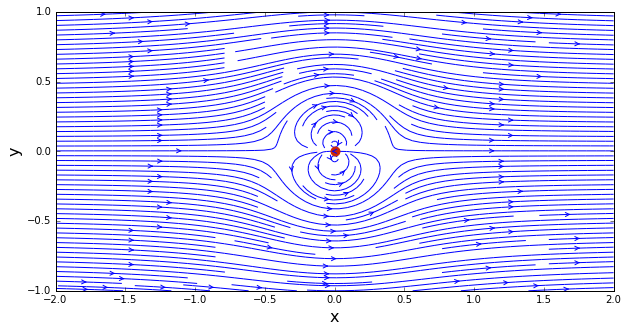

In [10]:
# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the cylinder radius
R = math.sqrt(kappa/(2*numpy.pi*u_inf))
circle = pyplot.Circle((0,0), Radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_path(circle)

# calculate stagnation points and add to graph
x_stagn1, y_stagn1 = +math.sqrt(kappa/(2*numpy.pi*u_inf)), 0
x_stagn2, y_stagn2 = -math.sqrt(kappa/(2*numpy.pi*u_inf)), 0
pyplot.scatter([x_stagn1, y_stagn1], [x_stagn2, y_stagn2], color='g', s=80, marker='o');